In [33]:
import numpy as np
import pandas as py
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
heartdata=py.read_csv("heart.csv")

In [35]:
heartdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [36]:
heartdata.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [37]:
heartdata.shape

(1025, 14)

In [38]:
heartdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [39]:
heartdata.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [40]:
targets=heartdata['target'].value_counts()

all columns

In [41]:
X=heartdata.drop(columns='target',axis=1)

#target column

In [42]:
Y=heartdata['target']

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(1025, 13) (820, 13) (205, 13)


In [44]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(Y_test, y_pred_dt)
print("Decision Tree accuracy:", acc_dt)

from sklearn.metrics import f1_score, confusion_matrix

f1_dt = f1_score(Y_test, y_pred_dt)
print("Decision Tree F1 score:", f1_dt)

cm_dt = confusion_matrix(Y_test, y_pred_dt)
print("Decision Tree confusion matrix:")
print(cm_dt)




Decision Tree accuracy: 1.0
Decision Tree F1 score: 1.0
Decision Tree confusion matrix:
[[100   0]
 [  0 105]]


In [45]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=2)
rf_model.fit(X_train, Y_train)

# Make predictions on the testing set
y_pred_rf = rf_model.predict(X_test)

# Calculate the accuracy of the model
acc_rf = accuracy_score(Y_test, y_pred_rf)
print("Random Forest accuracy:", acc_rf)



Random Forest accuracy: 1.0


In [47]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
y_pred_lr=lr.predict(X_test)
y_pred_lr[y_pred_lr<0.5]=0
y_pred_lr[y_pred_lr>=0.5]=1
acc_lr=accuracy_score(Y_test,y_pred_lr)
print("LINEAR REGRESSION ACCURACY :",acc_lr)

LINEAR REGRESSION ACCURACY : 0.8048780487804879


In [48]:
lor=LogisticRegression()
lor.fit(X_train,Y_train)
y_pred_lr=lor.predict(X_test)
acc_lr=accuracy_score(Y_test,y_pred_lr)
print("LOGISTIC REGRESSION ACCURACY :",acc_lr)

LOGISTIC REGRESSION ACCURACY : 0.8048780487804879


C:\Users\personal\python\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
model=LogisticRegression()
model.fit(X_train,Y_train )


X_train_prediction=model.predict(X_train)
trainigdataaccuracy=accuracy_score(X_train_prediction,Y_train)
print( trainigdataaccuracy)


0.8524390243902439


C:\Users\personal\python\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
X_test_prediction=model.predict(X_test)
testdataaccuracy=accuracy_score(X_test_prediction,Y_test)
print( testdataaccuracy)


0.8048780487804879


In [20]:
input_from_user=(71,0,0,112,149,0,1,125,0,1.6,1,0,2)
input_from_user_array=np.asarray(input_from_user)
input_from_user_reshaped=input_from_user_array.reshape(1,-1)
prediction=model.predict(input_from_user_reshaped)

if prediction[0]==0:
    print("Patient Doesnot have  Any Heart Dieseas")
else:
    print("Patient Has heart dieseas he needs more tests")    




Patient Has heart dieseas he needs more tests


C:\Users\personal\python\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [21]:
Y_test_probabilities = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, Y_test_probabilities)
roc_auc = auc(fpr, tpr)


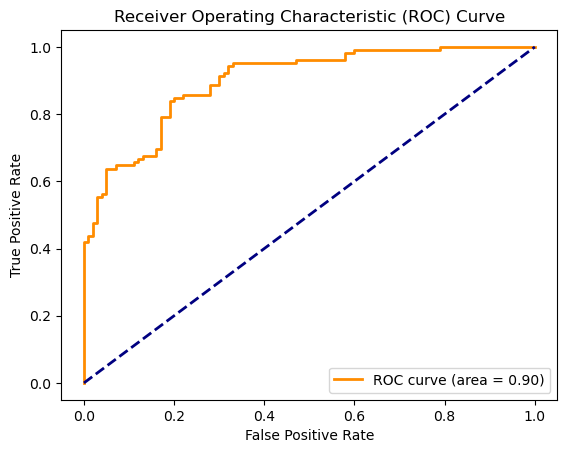

In [22]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [24]:
train_accuracies = []
test_accuracies = []
for i in range(1, 21):
        model.set_params(max_iter=i)
        model.fit(X_train, Y_train)
        Y_train_predictions = model.predict(X_train)
        Y_test_predictions = model.predict(X_test)
        train_accuracy = accuracy_score(Y_train_predictions, Y_train)
        test_accuracy = accuracy_score(Y_test_predictions, Y_test)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)



C:\Users\personal\python\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\personal\python\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

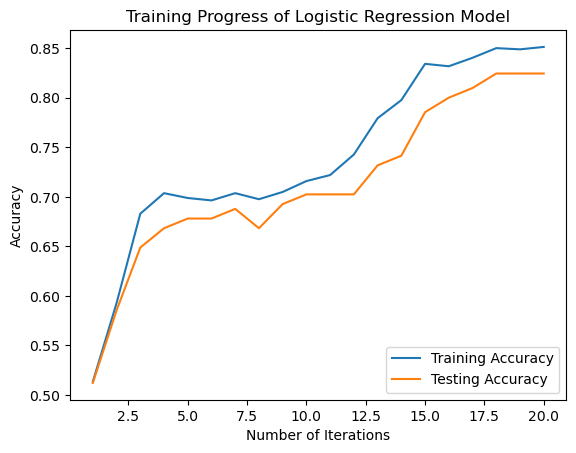

In [25]:
plt.plot(range(1, 21), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 21), test_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Training Progress of Logistic Regression Model')
plt.legend(loc='lower right')
plt.show()


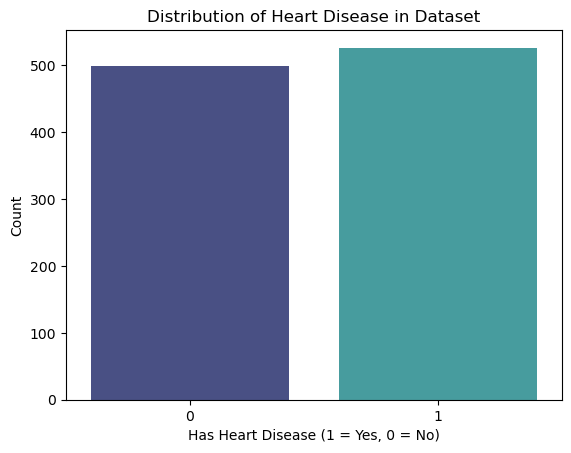

In [26]:
sns.countplot(data= heartdata, x='target', palette="mako")
plt.xlabel('Has Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease in Dataset')
plt.show()


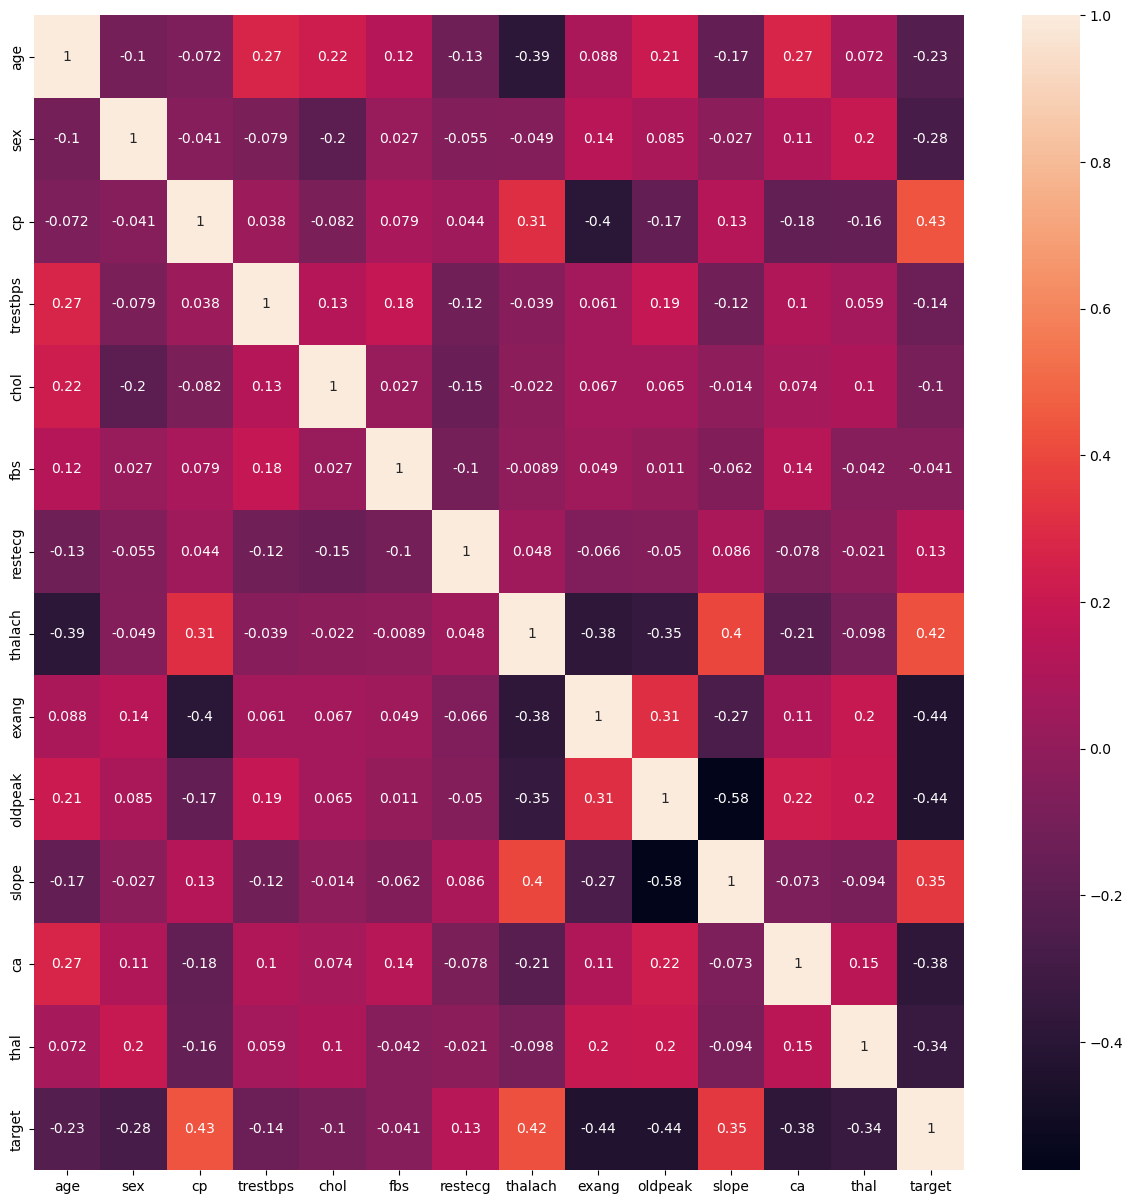

In [28]:
# Plot the heatmap
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(heartdata.corr(),ax=ax, annot=True)
# Show the plot
plt.show()
